# 인터넷 네이버 검색 결과 블로그 제목 10페이지 가져오기

####    
####   

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from bs4 import BeautifulSoup

## 1. 네이버 홈페이지 접근 및 검색어 입력

#### Selenium을 이용해 네이버에 접근

In [2]:
from selenium import webdriver


web_crawling = webdriver.Chrome("./chromedriver")

web_crawling.get('https://www.naver.com/')

#### 검색어 입력에 대한 해당하는 곳을 찾는다 .(find_element_by_name)
#### 찾은 후 미리 정의해 놓은 'search_word' 변수를 이용해 검색어를 입력한다.

In [3]:
search_word = '빅데이터'
web_crawling.find_element_by_name('query').send_keys(search_word)

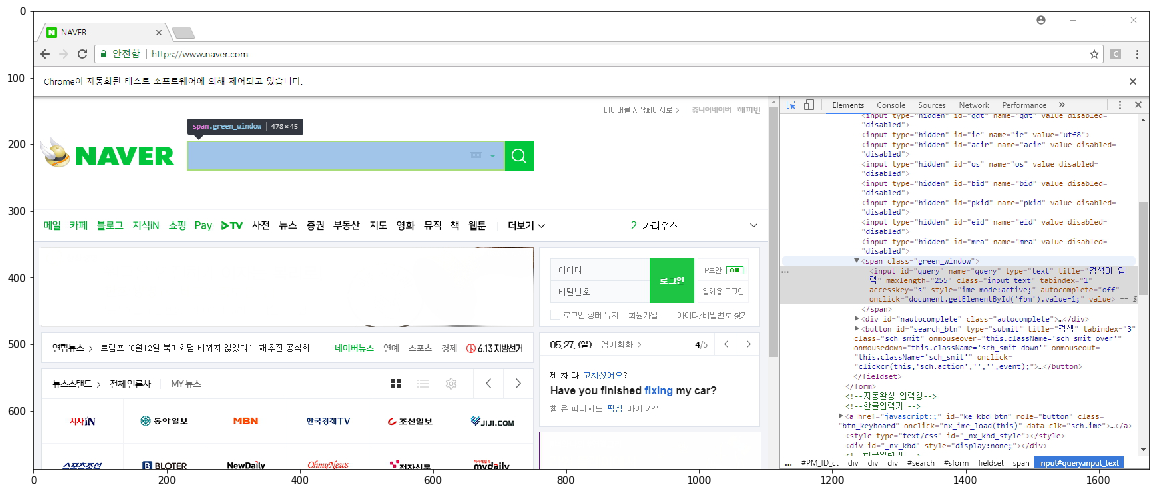

In [4]:
img = imread('search1.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

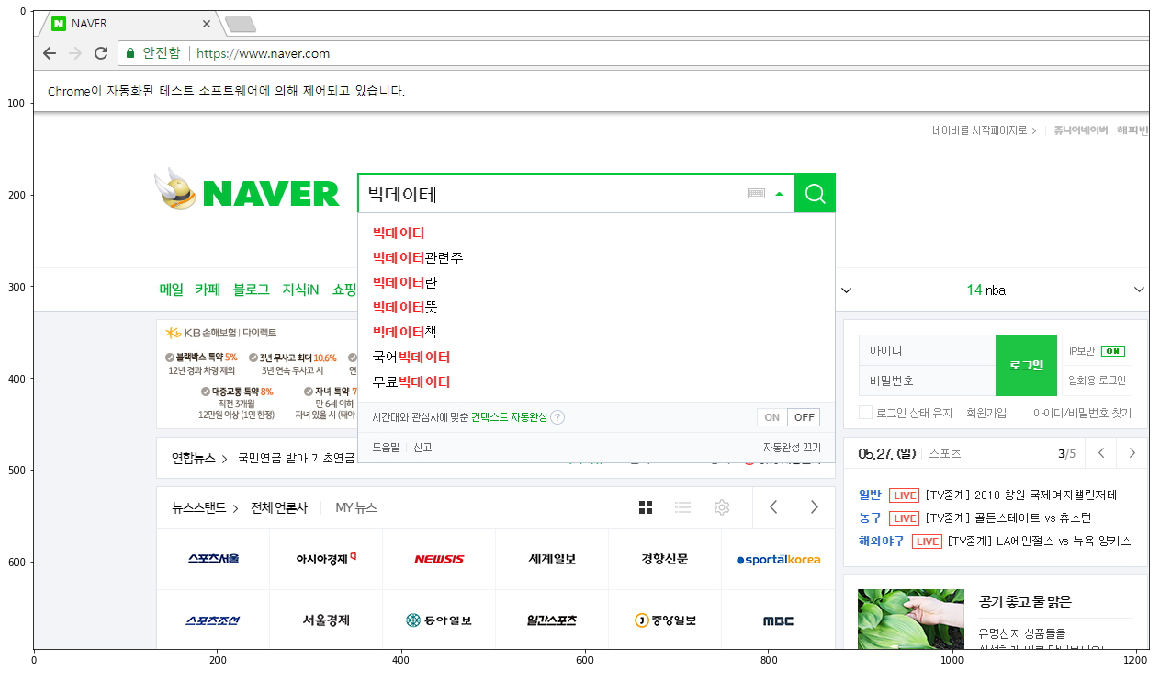

In [5]:
img = imread('search3.jpg')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

#### 검색어 버튼에 해당하는 부분을 찾느다.(find_element_by_css_selector)
#### 검색버튼을 누른다.(submit)

In [6]:
auto_search = web_crawling.find_element_by_id('search_btn')
auto_search.submit()

#### '블로그' 탭 누르기

In [7]:
all_tab = web_crawling.find_element_by_id('lnb')
blog = all_tab.find_element_by_class_name('lnb3') 
blog.click()

#### 블로그 탭 페이지에서 블로그 제목만 가져오기

In [8]:
html = web_crawling.page_source 

In [9]:
soup = BeautifulSoup(html, 'html.parser')  

In [10]:
blog_titles = soup.select('.sh_blog_title')

In [11]:
for n in blog_titles:            
    print(n.text)

제 9기 미래예측을 위한 빅데이터 아카데미 수강생 모집...
[여행 빅데이터] `가심비` 좋은 동남아 여행…꼭 챙겨야 할 앱 4
<돈이 보이는 빅데이터> 빅데이터, 이론이 아닌 현장에서...
[ 빅데이터, 공장을 변하게 하다 ]
[주얼리 빅데이터] 2018년 소셜 마케팅 키워드!(6월) 빅데이터...
빅데이터 기반으로 만든 여자 옷 쇼핑몰 파페피포 앱 이용후기
빅데이터 리더십
고려사이버대학교에서 빅데이터 전문가 육성?! 왜 나 때는...?
[와디즈] 빅데이터로 탄생한 C4 올인원 엔진오일+엔진코팅제...
파이썬학원 빅데이터전문가 기초 교육


#### 검색 결과를 살핀다